## Introduction

All data science and machine learning enthusiast have surely come across one very famous ML algorithm i.e. **Linear Regression** and have surely implemented the same using python and it's ML library named as **sklearn**. But are we aware of the **assumptions** that one needs to **check and validate** before using the linear regression model?

If the answer is **yes** then I'll still recommend to go through this article in order to **refresh the concepts** while for the ones of the answer is **no** then you have come to right place because in this article I'm gonna break through all the assumptions that needs to be care in case of **LR** model. 

## Assumptions of Linear Regression 

Here I've just listed down all the assumptions which we will discuss in both ways (conceptual and practical implementation using python)

1. **Linear Relationship**
2. **No Multicollinearity**
3. **rmality of residual**
4. **Homoscedacity**
5. **No Autocorrelation of errors**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Here we are starting the practical implementation by **importing all the necessary libraries** that we will require in the course of this article.

* **Pandas** for dealing dataframes
* **Numpy** for dealing with mathematical operations related to array.
* **Matplotlib** and seaborn for data visualization

In [16]:
df = pd.read_csv('data.csv')
df.head()

,feature1,feature2,feature3,target
0,-0.570563,1.420342,0.495580,-9.763182
1,-0.990563,0.556965,1.045064,-24.029355
2,-0.674728,0.150617,1.774645,45.616421
3,0.388250,-0.387127,-0.110229,34.135737
4,1.167882,-0.024104,0.145063,86.663647


To discuss the assumptions related to **LR algorithm**, I got the **dummy dataset** where we have 3 features and a target variable.

In [4]:
X = df.iloc[:,0:3].values     # Independent Variables
y = df.iloc[:,-1].values      # Dependent variable

In [5]:
# Dividing dataset in training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [6]:
# Model development 
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [7]:
# Extracting Residuals
y_pred = model.predict(X_test)
residual = y_test - y_pred

**Inference:** In the above set of code we followed all the steps in order to build the model which are as follows:

1. Extracting **dependent** and **independent** variables.
2. Dividing dataset into testing and training dataset using **train_test_split**
3. Model development using **sklearn** and it's **fit** function
4. Extracting the **residuals/errors** this was important step because we will need these in pur 3 assumption.

## 1. Linear Relationship

There should be a linear relationship between **input and output** i.e. **features and target**. Non-Linear relationships between both will not be able to capture by **Linear Regression** model. This is somewhere easy to pick when we have only one input and one output. But what if we have **multiple input** (which is more applicable in real world scenarios) then also every **feature** should be linearly related with **output (target)** variable.

This may sound bit confusing, so let's take a small **example**: Suppose we are working with **old car price** dataset where    we have multiple features say, Mileage, Year of purchase, Total kilometers a car has travelled etc. So each feature should      have a simulateneously **linear relationship** with **target variable**.

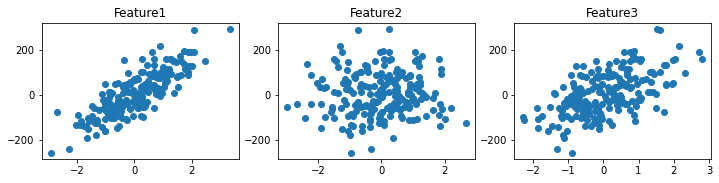

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 2.5))

ax1.scatter(df['feature1'], df['target'])
ax1.set_title("Feature1")
ax2.scatter(df['feature2'], df['target'])
ax2.set_title("Feature2")
ax3.scatter(df['feature3'], df['target'])
ax3.set_title("Feature3")

plt.show()

**Inference:** From the above lines of code we are plotting the **scatter plot** ure of target variable with each feature in the dataset in order to confirm that is the data linearly related with our output column or not.

From the above plot, we can clearly see that **Feature1** is perfectly correlated with target while **Feature2** is somewhere close to be correlated on the other hand **Feature3** is in the middle with respect to 1 and 2 as it is more linearly seperable than feature 2 and less than feature 1.

**Conclusion** The features/input in this dataset has linear relationship with the output variable hence we can move to check other assumptions for a better linear regression model.

## 2. Multicollinearity

This is the second assumption that we have to take care while moving forward with **Linear regression model**, Before digging deep into this case let's first understand that **what is Multicollinearity?** 

**Multicollinearity** is a term which we use when the features are not **independent** with each other i.e. the change in one feature results in the change of another one, and this is something which is **not needed in linear regression model** development. Let's take a simple **conceptual example** to understand how it can effect the performance of the model. Suppose we have to analyse the **performance of project** on which 2 scientists are working on with **same skills set**, so is it possible to take both of their features and see who performed better? 

No right! because they both are **correlated** so it won't make much sense but on the other hand if they have **different skills set** then it would have definitely made sense.

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(X_train.shape[1]):
    vif.append(variance_inflation_factor(X_train, i))

In [10]:
pd.DataFrame({'vif': vif}, index=df.columns[0:3]).T

,feature1,feature2,feature3
vif,1.010326,1.009871,1.01395


**Inference:** To check if the data has multicollinearity, we have very much dependable statistical measure i.e. **Variance Inflation Factor** which return us the real number and if that real number is **close to 1** for all the features then celebrate because your data is free from this pain while if the number is **5 or greater** than that so you should not go for linear regressor. 

<AxesSubplot:>

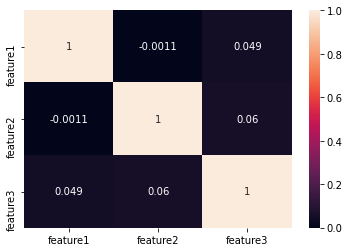

In [11]:
# Another Technique
sns.heatmap(df.iloc[:,0:3].corr(),annot=True)

**Inference:** One more technique to see the **multicollinearity** is finding the correlation using **corr() method** and plot the results in the form of **heat map**, the number game is still the same as it was in variance inflation factor. 

## 3. Normality of Residual

This is the third assumption in our list- **Normality of Residual**, if you are hearing for the first time then it can be intimidating in that case let me break it down for you. So here it means that the **residual or errors** that we get at the time of predictions should be normally distributed (most of the values should be **around 0** and few values only **away from 0**) when we will plot it, this can be seen through a **KDE (kernel density plot)**.

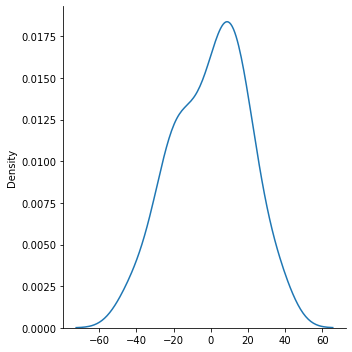

In [12]:
sns.displot(residual,kind='kde')

**Inference:** So as one can see in the above plot that our data is fairly **normally distributed** as most of the data points are close to 0 and only few are away from it and this is the visible evidence of **distribution being normal**.

There is one more method to check for this particular assumption i.e. **QQ plot**. Let's see how this can be insightful.

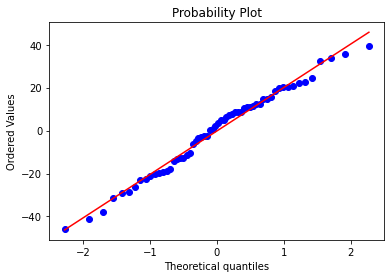

In [13]:
# QQ Plot

import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual, plot=ax, fit=True)

plt.show()

**Inference:** To see if the residuals are normal or not in **QQ plot** then those **blue dotted points** should be fairly close to that **red regression line** if that is there than the residuals are perfectly normal otherwise the assumption will be failed.

## 4. Homoscedasticity

This assumption is also related to the residuals/errors only but this time it is **not related to distribution** but it's related to **spread of errors**. Let's break down this word which is loaded with heavy vocab :). **"Homo"** means **same** while **scedasticity** means **spread** combining them gives the meaning as, same spread i.e. the **residuals should be spread evenly along the sample space.** 

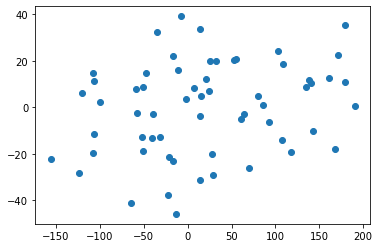

In [14]:
plt.scatter(y_pred,residual)

**Inference:** We have plotted the **scatter plot of the residuals/errors** in order to see how they are spread across sample space and by looking at the above plot we can conclude that the data points related to errors are **evenly spread**, so this assumption is accepted in our case.

## 5. Autocorrelation of Residuals

In the list this is our **5th assumption** but continously **3rd one** with respect to **errors/residuals**. In this assumption we see that whether our error is giving us **positive autocorrelation** (if we plot in this condition then there would be some sort of **pattern** between residual's data points) or **negative autocorrelation** (in this case there would **no pattern** infact the data points are abruptly distributed). If want our assumption to be accepted then the dataset should fall in the category of **negative autocorrelation**.

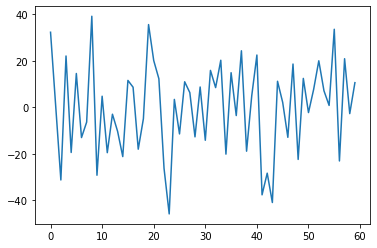

In [15]:
plt.plot(residual)

**Inference:** As discussed above, if we want our assumption to be passed then we need to see the negative autocorrelation which is clearly visible in the above residual plot as there is **no pattern** what so ever in here which brings us to conclusion that this assumption is also **positive.**

## Conclusion

Here we are at the last section of the article, As we have discussed a lot in this article so it will be a very **short, crisp and informative** part where it will give you a sense of revision of all the topics that we have discussed so far.

1. First we started with some boiler code like extracting **features** and **target** variables, breaking dataset into **training and testing** set, getting the **residuals/errors**.

2. Now, comes the first assumption where we discussed why **linear relationship** is necessary among features and target variables. Then, **Multicollinearity** was next where we learned that in order to work with LR model we need to have dataset whose independent variables are not correlated with each other.

3. **Normality of Residual**, the third assumption taught us that the distribution of the errors should be normal that we saw using **KDE** and **QQ** plot. Then, comes **Homoscedasticity** which means "**same spread of error** in the sample space" we saw this practically using **scatter plot**.

4. The last was **Auto Correlation of Residuals**, in which if we want the assumption to be accepted then there should be negative auto correlation of residuals i.e. no pattern between residual data points.